In [55]:
import sys
# Make sure jupyter python path is set to root of the project directory
sys.path.insert(1, "/Users/anuraagaravindan/Desktop/imc_trading")
import os
# from packages.backtester import BackTester as backtester
# from packages.logger import Logger as logger
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np


In [56]:
df = pd.read_csv("tutorial.csv", delimiter=";")
starfruit_price_action = df[(df["product"] == "STARFRUIT")]
amethysts_price_action = df[(df["product"] == "AMETHYSTS")]

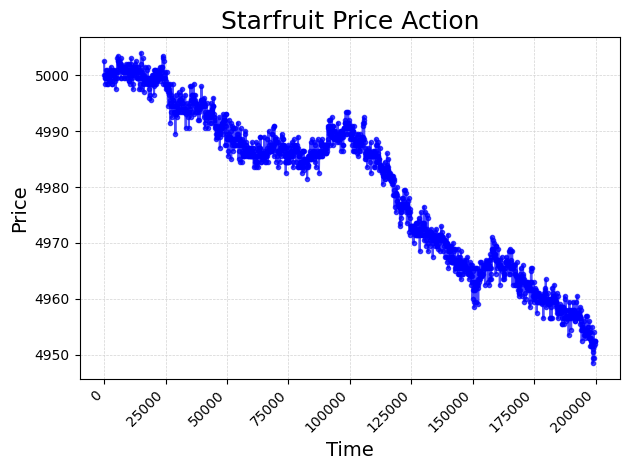

In [57]:
timestamps = starfruit_price_action["timestamp"]
starfruit_price = starfruit_price_action["mid_price"]
plt.plot(timestamps, starfruit_price, marker='o', linestyle='-', color='blue', alpha=0.7, markersize=3)
plt.xticks(color='black', rotation=45, ha='right')
plt.yticks(color='black')
plt.title('Starfruit Price Action', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<Figure size 1400x500 with 0 Axes>

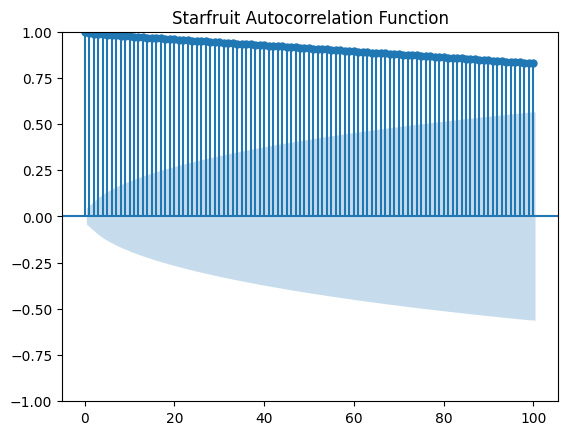

<Figure size 1400x500 with 0 Axes>

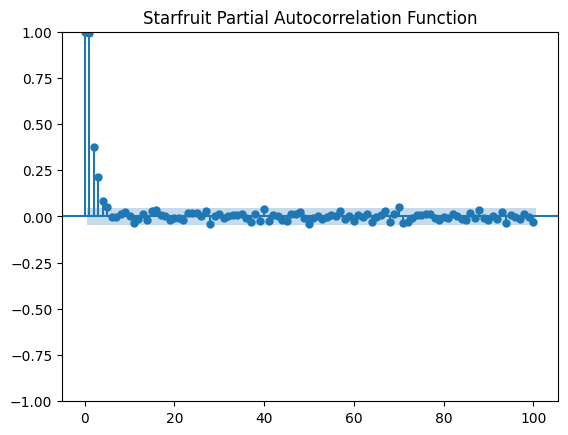

In [58]:
plt.figure(figsize=(14, 5))
plot_acf(starfruit_price, lags=100, alpha=0.05)
plt.title('Starfruit Autocorrelation Function')

plt.show()

plt.figure(figsize=(14, 5))
plot_pacf(starfruit_price, lags=100, alpha=0.05)
plt.title('Starfruit Partial Autocorrelation Function')

plt.show()

In [59]:
# Fit ARIMA model
starfruit_model = ARIMA(starfruit_price.reset_index(drop=True), order=(4, 1, 1))
arima_starfruit = starfruit_model.fit()

# Summary of the model
print(arima_starfruit.summary())

# Make forecast
print("Forecasting Results:")
forecast = arima_starfruit.forecast(steps=3)
print(forecast)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              mid_price   No. Observations:                 2000
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -3435.255
Date:                Thu, 04 Apr 2024   AIC                           6882.510
Time:                        22:23:26   BIC                           6916.113
Sample:                             0   HQIC                          6894.849
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0404      0.052      0.780      0.435      -0.061       0.142
ar.L2         -0.0121      0.042     -0.287      0.774      -0.095       0.071
ar.L3          0.0449      0.035      1.286      0.1

In [84]:
arima_starfruit = starfruit_price_action.copy()
arima_starfruit["ARIMA_Prediction"] = None
#arima_starfruit.index = pd.to_datetime(starfruit_price_action["timestamp"])
for end in range(3, len(df)):
    # Train the model on data up to the current point
    model = ARIMA(starfruit_price_action["mid_price"][:end], order=(4,1,1))  # Replace with your chosen order
    model_fit = model.fit()
    # coefficients = model_fit.params
    # print(f"Coefficients at iteration {end}: {coefficients}")
    
    # Make the one-step-ahead forecast
    forecast = model_fit.forecast(steps=1)

    if end < len(starfruit_price_action):
        arima_starfruit.loc[arima_starfruit.index[end], 'ARIMA_Prediction'] = forecast.iloc[0]
    else:
        break
    last_model_fit = model_fit
if last_model_fit is not None:
    print("Coefficients from the last ARIMA model fit:")
    print(last_model_fit.params)

arima_new = arima_starfruit.copy()
# print(arima_new.head())
plt.figure(figsize=(14, 7))
plt.plot(arima_starfruit["timestamp"], starfruit_price_action["mid_price"], label='Actual')
plt.plot(arima_starfruit['timestamp'], arima_starfruit["ARIMA_Prediction"], color='red', label='ARIMA Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of the ARIMA Predictions')
plt.legend()
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

/var/folders/q8/2zbd_2kn07vgmk8j5h_d419m0000gn/T/ipykernel_59837/4080735803.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Prediction'] = predictions


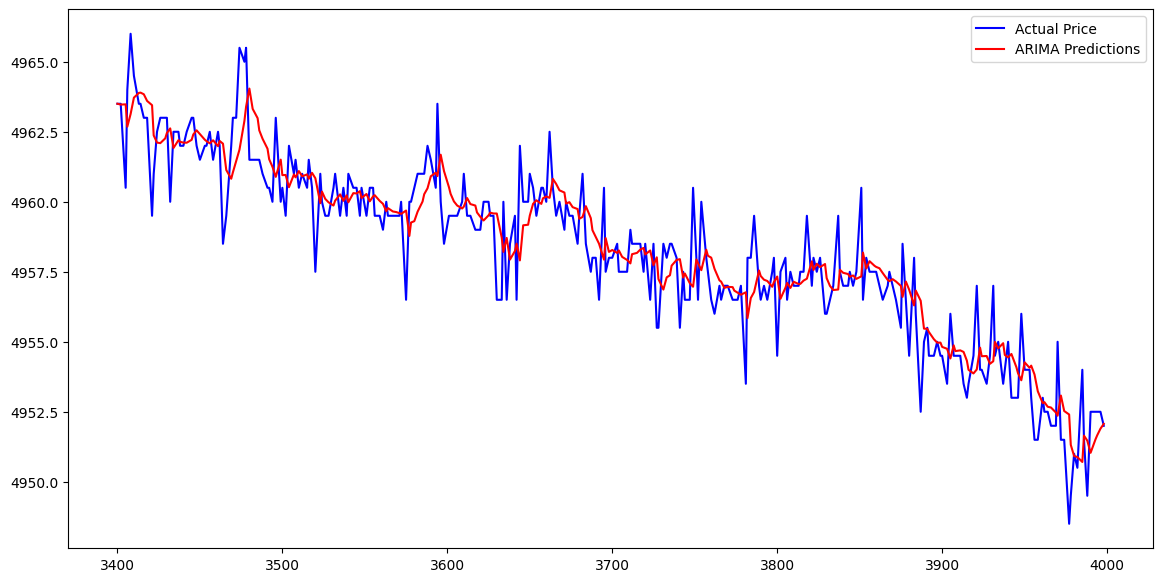

In [99]:
split_index = int(len(starfruit_price_action) * 0.85)
train_data = starfruit_price_action.iloc[:split_index]
test_data = starfruit_price_action.iloc[split_index:]

order = (2, 1, 1)

history = train_data['mid_price'].tolist()
predictions = []

for t in range(len(test_data)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(test_data.iloc[t]['mid_price'])

test_data['ARIMA_Prediction'] = predictions
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['mid_price'], label='Actual Price', color='blue')
plt.plot(test_data.index, test_data['ARIMA_Prediction'], color='red', label='ARIMA Predictions')
plt.legend()
plt.show()

In [96]:
from IPython.display import display, HTML
residuals = predictions - test_data['mid_price']
std = np.std(residuals)
print(std)
display(HTML(test_data.to_html()))

1.3426258521097736


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ARIMA_Prediction
3720,-2,186000,STARFRUIT,4955,26,NaN,NaN,NaN,NaN,4962,26,NaN,NaN,NaN,NaN,4958.5,-869.570312,4958.124765
3723,-2,186100,STARFRUIT,4956,2,4955.0,26.0,NaN,NaN,4957,4,4962.0,28.0,NaN,NaN,4956.5,-861.554688,4958.258325
3725,-2,186200,STARFRUIT,4956,24,NaN,NaN,NaN,NaN,4961,7,4963.0,24.0,NaN,NaN,4958.5,-856.343750,4957.706714
3727,-2,186300,STARFRUIT,4955,29,NaN,NaN,NaN,NaN,4956,10,4962.0,29.0,NaN,NaN,4955.5,-868.046875,4958.011285
3728,-2,186400,STARFRUIT,4955,30,NaN,NaN,NaN,NaN,4956,1,4962.0,30.0,NaN,NaN,4955.5,-867.656250,4957.220839
3731,-2,186500,STARFRUIT,4955,31,NaN,NaN,NaN,NaN,4962,31,NaN,NaN,NaN,NaN,4958.5,-867.906250,4956.874933
3733,-2,186600,STARFRUIT,4956,2,4955.0,27.0,NaN,NaN,4960,7,4962.0,29.0,NaN,NaN,4958.0,-864.406250,4957.290221
3735,-2,186700,STARFRUIT,4955,27,NaN,NaN,NaN,NaN,4962,27,NaN,NaN,NaN,NaN,4958.5,-871.414062,4957.356136
3736,-2,186800,STARFRUIT,4956,6,4955.0,20.0,NaN,NaN,4961,20,NaN,NaN,NaN,NaN,4958.5,-879.718750,4957.808033
3739,-2,186900,STARFRUIT,4955,1,4954.0,30.0,NaN,NaN,4961,31,NaN,NaN,NaN,NaN,4958.0,-880.703125,4958.016694


In [61]:
# # print(arima_starfruit.head())
# # print(arima_new.head())
# print(arima_new['ARIMA_Prediction'])
# arima_starfruit["diff1"][8:len(arima_starfruit)] = arima_starfruit["ARIMA_Prediction"][8:len(arima_starfruit)].diff()

# # Drop the NaN values that this operation creates at the beginning of the series
# #arima_starfruit = arima_starfruit.dropna()

# # Perform the Dickey-Fuller test on your time series data, e.g., df['Value']
# adf_result = adfuller(arima_starfruit["diff1"])

# print('ADF Statistic: %f' % adf_result[0])
# print('p-value: %f' % adf_result[1])
# print('Critical Values:')
# for key, value in adf_result[4].items():
#     print('\t%s: %.3f' % (key, value))

arima_starfruit = arima_starfruit.dropna(subset=['ARIMA_Prediction'])

# Now perform first order differencing on the 'ARIMA_Prediction' column
arima_starfruit["diff1"] = arima_starfruit["ARIMA_Prediction"].diff()

# After differencing, drop any NaN values that result from this operation
arima_starfruit = arima_starfruit.dropna(subset=['diff1'])

# Perform the Dickey-Fuller test on your differenced time series data
adf_result = adfuller(arima_starfruit["diff1"])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.466687
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [62]:
arima_starfruit.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ARIMA_Prediction,diff1
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,-8.546875,4997.348185,-4.760197
11,-2,500,STARFRUIT,4996,30,NaN,NaN,NaN,NaN,5003,30,NaN,NaN,NaN,NaN,4999.5,-7.114258,4997.072414,-0.275771
12,-2,600,STARFRUIT,4999,5,4997.0,6.0,4996.0,25.0,5003,25,NaN,NaN,NaN,NaN,5001.0,-6.204102,4998.440576,1.368162
15,-2,700,STARFRUIT,4997,2,4996.0,23.0,NaN,NaN,5003,23,NaN,NaN,NaN,NaN,5000.0,-6.464844,5001.096391,2.655815
17,-2,800,STARFRUIT,4997,30,NaN,NaN,NaN,NaN,5003,1,5004.0,29.0,NaN,NaN,5000.0,-5.850586,4998.329599,-2.766792


In [63]:
starfruit_price_action.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.000000
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,-6.269531
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,-6.599609
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,-8.546875


In [72]:
columns = ['4 days ago', '3 days ago', '2 days ago', '1 day ago', 'Arima_Prediction']
result_df = pd.DataFrame(columns=columns)
for i in range(4, len(starfruit_price_action)):
    current_timestamp = starfruit_price_action.iloc[i]['timestamp']
    prev_mid_prices = starfruit_price_action.iloc[i-4:i]['mid_price'].values
    arima_pred_row = arima_starfruit[arima_starfruit['timestamp'] == current_timestamp]
    if not arima_pred_row.empty:
        arima_pred = arima_pred_row.iloc[0]['ARIMA_Prediction']
        temp_df = pd.DataFrame([prev_mid_prices.tolist() + [arima_pred]], columns=columns)
        result_df = pd.concat([result_df, temp_df], ignore_index=True)

result_df

,4 days ago,3 days ago,2 days ago,1 day ago,Arima_Prediction
0,5002.5,5000.0,5000.0,4999.5,4997.348185
1,5000.0,5000.0,4999.5,4998.5,4997.072414
2,5000.0,4999.5,4998.5,4999.5,4998.440576
3,4999.5,4998.5,4999.5,5001.0,5001.096391
4,4998.5,4999.5,5001.0,5000.0,4998.329599
...,...,...,...,...,...
1991,4950.5,4954.0,4951.5,4949.5,4951.142881
1992,4954.0,4951.5,4949.5,4952.5,4951.532574
1993,4951.5,4949.5,4952.5,4952.5,4951.612057
1994,4949.5,4952.5,4952.5,4952.5,4951.937021


[0.19306981 0.2421692  0.22018225 0.34276968] 9.045124812141694


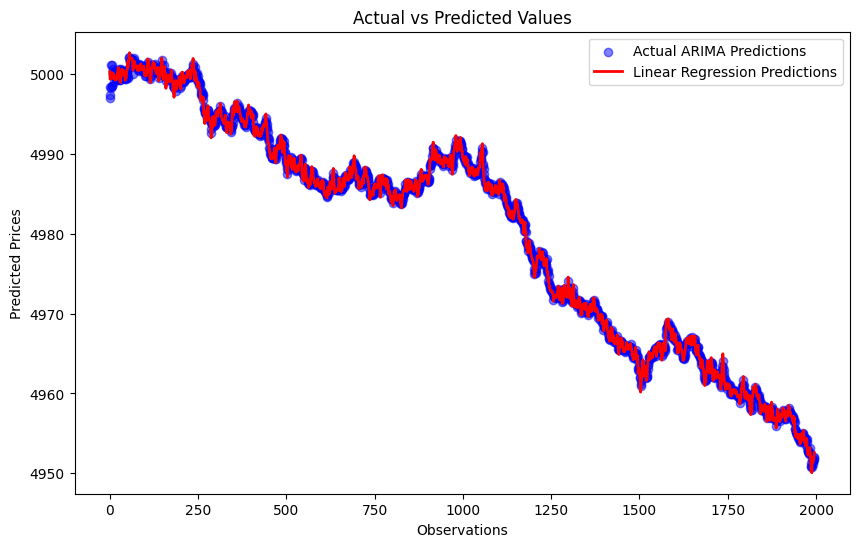

Standard Deviation of the residuals: 0.33310497835424496


In [77]:
from sklearn import linear_model
X = result_df[['4 days ago', '3 days ago', '2 days ago', '1 day ago']]
y = result_df['Arima_Prediction']
regr = linear_model.LinearRegression()
regr.fit(X, y)

y_pred = regr.predict(X)

residual = y - y_pred
std_deviation = np.std(residual)


coef_arr = regr.coef_
intercept = regr.intercept_
print(coef_arr, intercept)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual ARIMA Predictions', alpha=0.5)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Linear Regression Predictions', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Observations')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
print("Standard Deviation of the residuals:", std_deviation)

float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Li

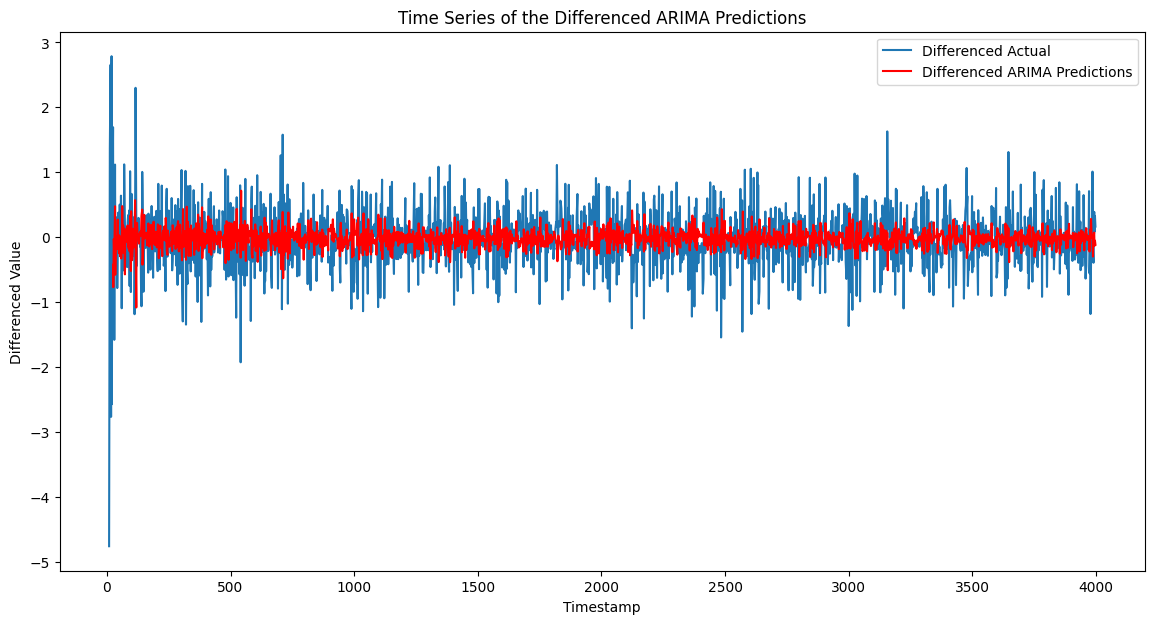

In [64]:
arima_diff = arima_starfruit.dropna(subset=['diff1'])

# We're now working with differenced data, so the ARIMA model's order of integration (d) should be zero
arima_diff['diff1'] = pd.to_numeric(arima_diff['diff1'], errors='coerce')

# Ensure there are no NaN values left after conversion
arima_diff = arima_diff.dropna(subset=['diff1'])

# Verify the data type
print(arima_diff['diff1'].dtype)

# Proceed with the modeling
for end in range(8, len(arima_diff)):
    # Train the ARIMA model on the numeric and non-NaN differenced data
    model = ARIMA(arima_diff['diff1'][:end], order=(1, 1, 1))
    model_fit = model.fit()

    # Make the one-step-ahead forecast on the differenced data
    forecast = model_fit.forecast(steps=1)

    if end < len(arima_diff):
        # Store the differenced forecast directly
        arima_diff.loc[arima_diff.index[end], 'ARIMA_Diff_Prediction'] = forecast.iloc[0]
    else:
        break

# Plotting the differenced predictions against the differenced actual values
plt.figure(figsize=(14, 7))
plt.plot(arima_diff.index, arima_diff["diff1"], label='Differenced Actual')
plt.plot(arima_diff.index, arima_diff["ARIMA_Diff_Prediction"], color='red', label='Differenced ARIMA Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Differenced Value')
plt.title('Time Series of the Differenced ARIMA Predictions')
plt.legend()
plt.show()

In [65]:
# last_known_actual = arima_starfruit['mid_price'].iloc[-1]

# # Convert differenced predictions into absolute predictions
# # Initialize the list with the last known actual value
# absolute_predictions = [last_known_actual]

# # Loop over the differenced predictions
# for prediction_diff in arima_starfruit['ARIMA_Prediction'][1:]:
#     # Add the differenced prediction to the last known value
#     last_known_actual += prediction_diff
#     absolute_predictions.append(last_known_actual)

# # Now absolute_predictions contains the predicted prices on the original scale
# # Make sure to align the predictions with the corresponding timestamps
# arima_starfruit['Integrated_ARIMA_Prediction'] = absolute_predictions

# # Plot the results
# plt.figure(figsize=(14, 7))
# plt.plot(arima_starfruit.index, arima_starfruit['mid_price'], label='Actual Price')
# plt.plot(arima_starfruit.index, arima_starfruit['Integrated_ARIMA_Prediction'], color='red', label='Integrated ARIMA Predictions')
# plt.xlabel('Timestamp')
# plt.ylabel('Price')
# plt.title('Time Series of the ARIMA Predictions on the Original Scale')
# plt.legend()
# plt.show()